1)Proszę stworzyć zestaw punktów należących do dwóch klas: **K1** i **K2**.  Punkty z klasy **K1** powinny być losowane z rozkładu normalnego o średniej **[0, -1]** i wariancji **1**. Punkty z klasy **K2** powinny pochodzić z rozkładu normalnego o średniej **[1, 1]** i wariancji **1**. Całościowo zbiór powinien zawierać **200 punktów**, po 100 dla każdej klasy.   
Należy wybrać **zbiory uczące** o następującej liczebności: **5, 10, 20 oraz 100**.  Dla każdego wariantu podziału znalezy znaleźć równanie **prostej**, która najlepiej oddziela klasy **K1** i **K2**. Uzyskaną prostą należy
zaprezentować razem z punktami testowymi i linią (hiperpłaszczyzną), która oddziela klasy. Następnie należy ocenić to jak dobrze klasyfikator działa od proporcji danych uczących i testujących.

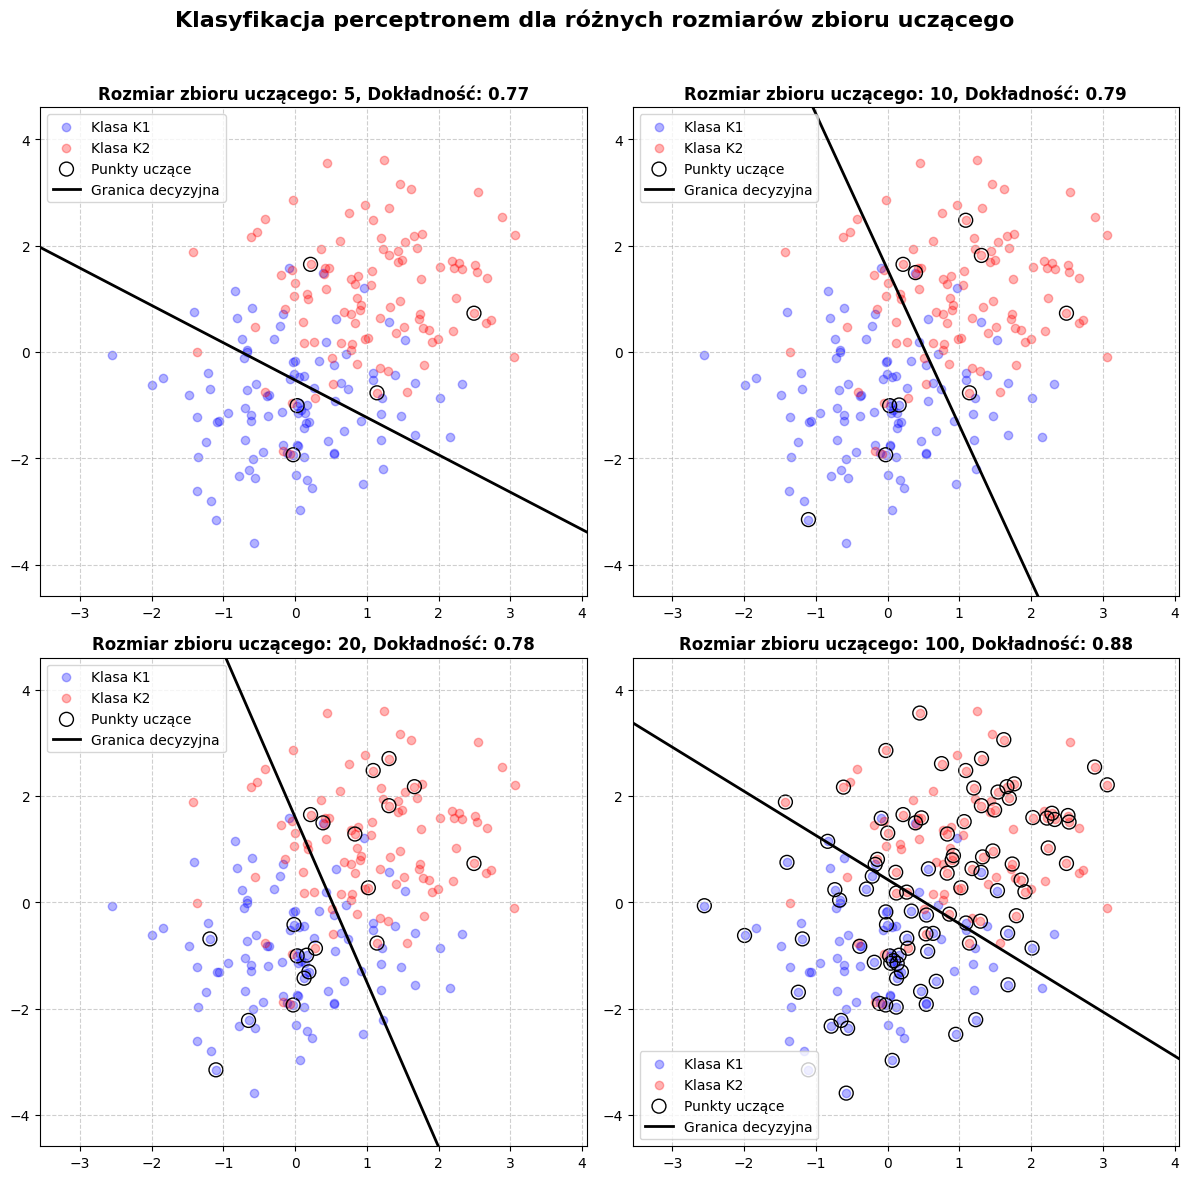

Rozmiar zbioru uczącego: 5, Dokładność: 0.77
Rozmiar zbioru uczącego: 10, Dokładność: 0.79
Rozmiar zbioru uczącego: 20, Dokładność: 0.78
Rozmiar zbioru uczącego: 100, Dokładność: 0.88


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

K1 = np.random.normal([0, -1], [1, 1], [100, 2])
K2 = np.random.normal([1, 1], [1, 1], [100, 2])
K = np.concatenate((K1, K2))
y = np.concatenate((np.ones(100), np.full(100, 2)))
rozmiary_zb_uczacych = [5, 10, 20, 100]

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("Klasyfikacja perceptronem dla różnych rozmiarów zbioru uczącego", fontsize=16, fontweight='bold')
axes = axes.ravel()

x_min, x_max = K[:, 0].min() - 1, K[:, 0].max() + 1
y_min, y_max = K[:, 1].min() - 1, K[:, 1].max() + 1

wyniki = []

for i, rozmiar in enumerate(rozmiary_zb_uczacych):
    X_train, X_test, y_train, y_test = train_test_split(K, y, train_size=rozmiar, stratify=y, random_state=42)

    neuron = Perceptron(tol=1e-3, max_iter=1000, random_state=42)
    neuron.fit(X_train, y_train)
    dokładność = neuron.score(X_test, y_test)

    wyniki.append(f'Rozmiar zbioru uczącego: {rozmiar}, Dokładność: {dokładność:.2f}')

    ax = axes[i]
    ax.scatter(K1[:, 0], K1[:, 1], color='blue', alpha=0.3, label='Klasa K1')
    ax.scatter(K2[:, 0], K2[:, 1], color='red', alpha=0.3, label='Klasa K2')
    ax.scatter(X_train[:, 0], X_train[:, 1], edgecolors='black', facecolors='none', s=100, label='Punkty uczące', marker='o')

    x1 = np.linspace(x_min, x_max, 100)
    if neuron.coef_[0][1] != 0:
        x2 = -(neuron.coef_[0][0] * x1 + neuron.intercept_[0]) / neuron.coef_[0][1]
        ax.plot(x1, x2, '-k', linewidth=2, label='Granica decyzyjna')

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.legend()
    ax.set_title(f'Rozmiar zbioru uczącego: {rozmiar}, Dokładność: {dokładność:.2f}', fontsize=12, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

for wynik in wyniki:
    print(wynik)


2)Analiza próbek benzyny wykazała że może ona być przypisana do dwóch klas czystości A i B       (dla potrzeb zadania można je oznaczyć                         
0 i 1). Proszę skorzystać z pliku fuel.txt, w którym pierwsze trzy kolumny to właściwości fizykochemiczne próbek, czwarta kolumna - klasa czystości.
Proszę sprawdzić skuteczność sieci opartej o pojedynczy neuron do klasyfikacji w tym problemie, porównując wyniki dla pięciokrotnego uczenia sieci. Proszę potraktować wszystkie dane jako dane uczące.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

         c_1    c_2      c_3 purity_class
0    645.795  0.151  155.570            B
1   1334.246  0.022  154.000            B
2   1102.023  0.122  155.495            B
3    316.575  0.070  152.951            B
4   -427.025  0.199  150.674            A
..       ...    ...      ...          ...
95  -115.427  0.268  150.050            A
96  -832.368 -0.043  155.309            A
97  1565.969  0.270  153.176            B
98 -1435.530  0.093  154.408            A
99 -1983.326  0.054  151.766            A

[100 rows x 4 columns]

Iteracja 1:
Dokładność w tej iteracji: 0.82


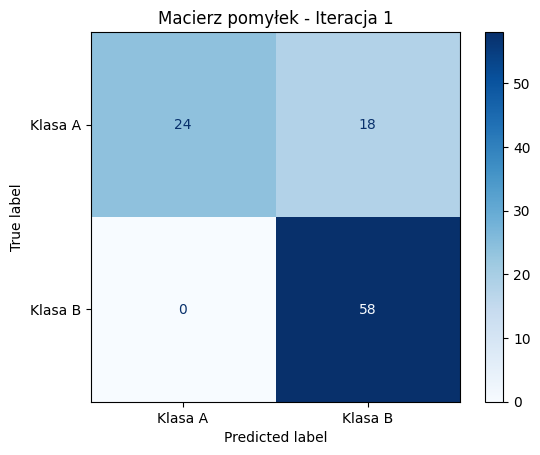


Iteracja 2:
Dokładność w tej iteracji: 0.82


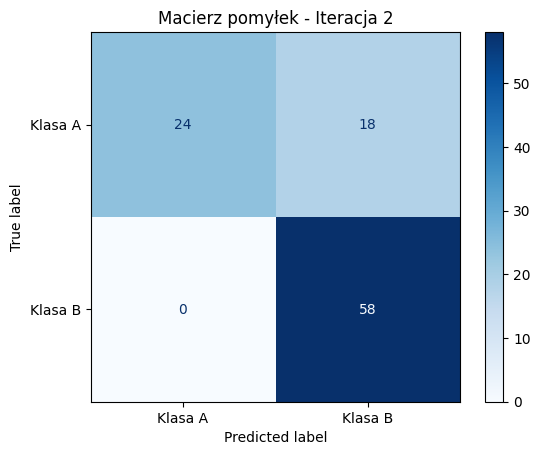


Iteracja 3:
Dokładność w tej iteracji: 0.82


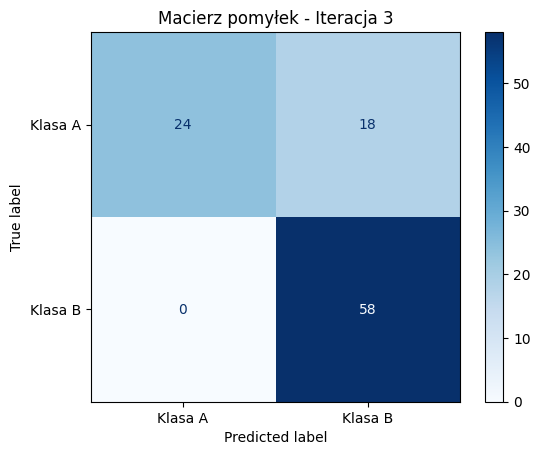


Iteracja 4:
Dokładność w tej iteracji: 0.82


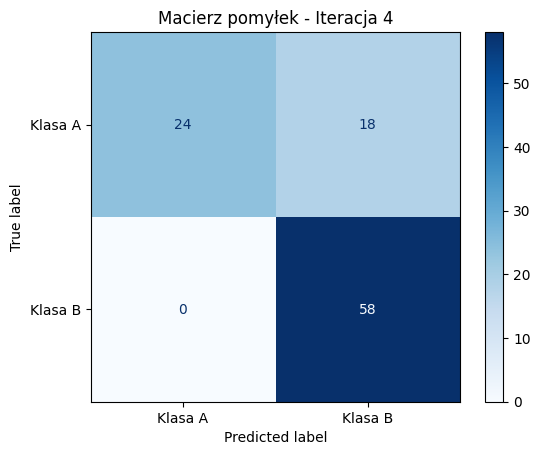


Iteracja 5:
Dokładność w tej iteracji: 0.82


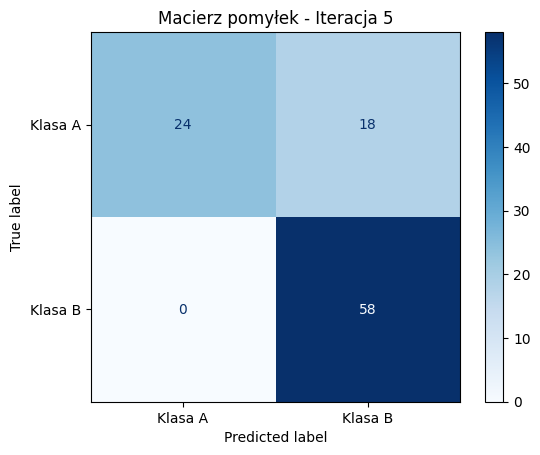

In [56]:
X = pd.read_csv("data/fuel.txt", sep=",", header=0)
y = X['purity_class'].apply(lambda x: 0 if x == 'A' else 1)
print(X)

X.drop(columns=['purity_class'], inplace=True)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
neuron = Perceptron(tol=1e-3, max_iter=1000, random_state=42)

for i in range(5):
    print(f"\nIteracja {i+1}:")

    neuron.fit(X_scaled, y)
    predictions = neuron.predict(X_scaled)
    accuracy = neuron.score(X_scaled, y)
    print(f"Dokładność w tej iteracji: {accuracy:.2f}")

    # Macierz pomyłek
    cm = confusion_matrix(y, predictions, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Klasa A', 'Klasa B'])
    disp.plot(cmap='Blues')
    plt.title(f"Macierz pomyłek - Iteracja {i+1}")
    plt.show()


Macierz pomyłek po 5 iteracji:           
**Klasa A - klasa A** = 24,
**Klasa A - Klasa B** = 18,
**Klassa B - Klasa A** = 0,
**Klasa B - klasa B** = 58.

3)
Proszę pobrać zbiór https://archive.ics.uci.edu/ml/datasets/iris. Można to też zrobić w pythonie używając funkcji sklearn.datasets.load_iris().



Następnie proszę dokonać samodzielnego podziału na dane uczące i testujące w proporcji 80%/20%. Proszę zbudować sieć złożoną z pojedynczej warstwy perceptronów (np. używając omawianej już tutaj funkcji sklearn.linear_model.Perceptron), której zadaniem będzie jak najdokładniejsza klasyfikacja gatunków irysów na podstawie ich pomiarów. Proszę dokonać analizy macierzy pomyłek dla kilku uruchomień algorytmu. Zachęcam do rozważenia pytania: jaką największą trafność jest w stanie uzyskać w klasyfikacji irysów z podanego zbioru pojedyncza warstwa perceptronów? Dlaczego? (Podpowiedź: polecamy przyjrzeć się pojęciu liniowej separowalności)


Uruchomienie: 1
Macierz pomyłek:
[[ 7  0  0]
 [ 0  0 13]
 [ 0  0 10]]
Dokładność: 0.57

Uruchomienie: 2
Macierz pomyłek:
[[ 7  0  0]
 [ 0 11  0]
 [ 0  8  4]]
Dokładność: 0.73

Uruchomienie: 3
Macierz pomyłek:
[[13  0  0]
 [ 9  1  0]
 [ 0  0  7]]
Dokładność: 0.70

Uruchomienie: 4
Macierz pomyłek:
[[11  0  0]
 [ 1  8  1]
 [ 0  0  9]]
Dokładność: 0.93

Uruchomienie: 5
Macierz pomyłek:
[[11  0  0]
 [ 1  9  0]
 [ 0  3  6]]
Dokładność: 0.87

Uruchomienie: 6
Macierz pomyłek:
[[13  0  0]
 [ 0  0  7]
 [ 0  0 10]]
Dokładność: 0.77

Uruchomienie: 7
Macierz pomyłek:
[[ 8  0  0]
 [ 1  0 10]
 [ 0  0 11]]
Dokładność: 0.63

Uruchomienie: 8
Macierz pomyłek:
[[10  1  0]
 [ 0 10  0]
 [ 0  8  1]]
Dokładność: 0.70

Uruchomienie: 9
Macierz pomyłek:
[[ 7  1  0]
 [ 0 11  1]
 [ 0  1  9]]
Dokładność: 0.90

Uruchomienie: 10
Macierz pomyłek:
[[12  0  0]
 [ 1  4  2]
 [ 0  0 11]]
Dokładność: 0.90

Srednia dokładnosc po 10 uruchomieniach: 0.77


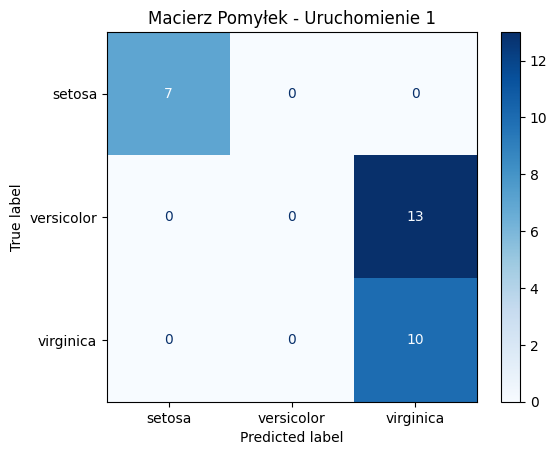

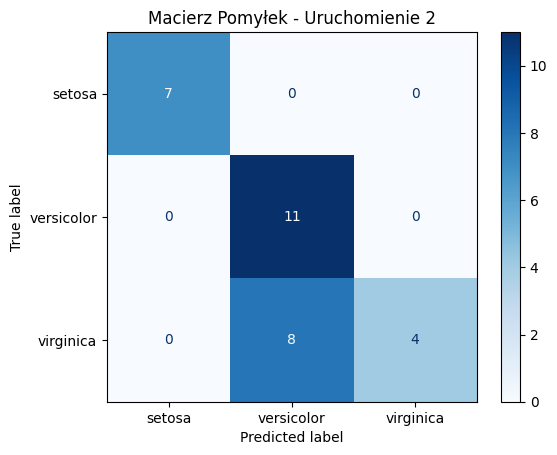

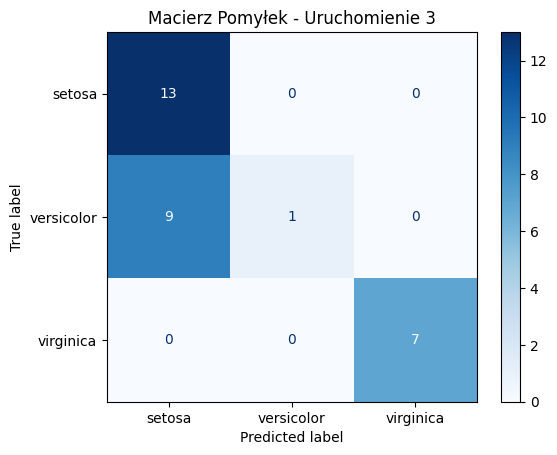

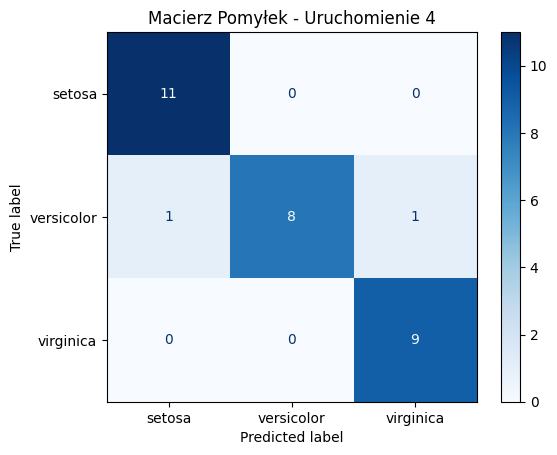

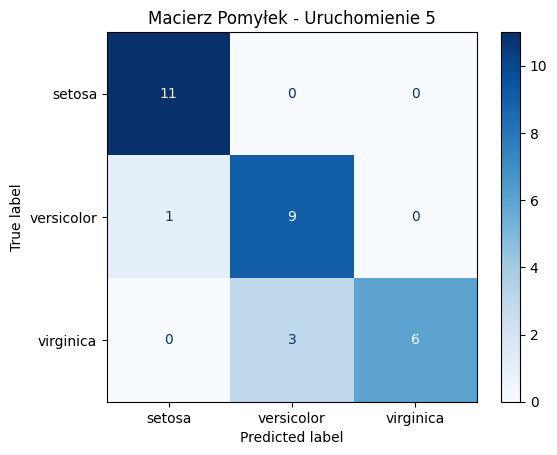

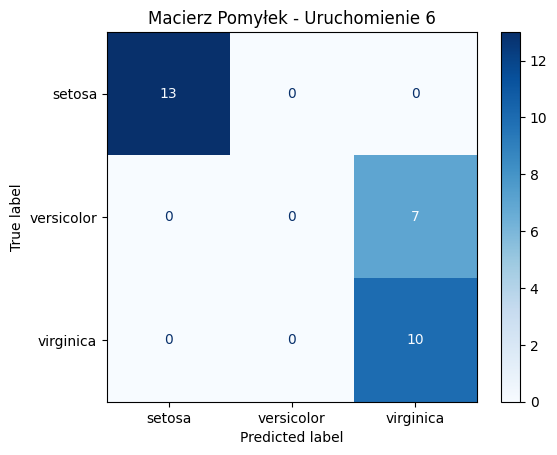

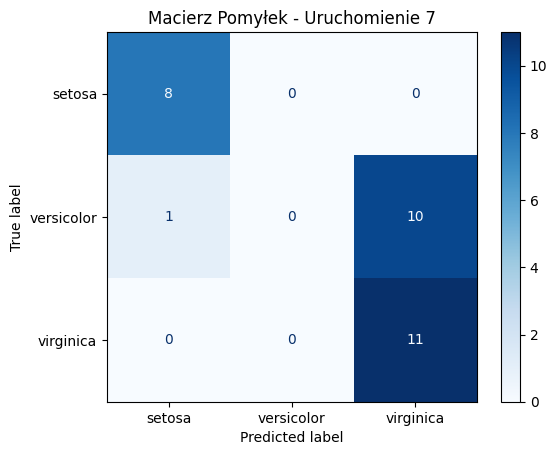

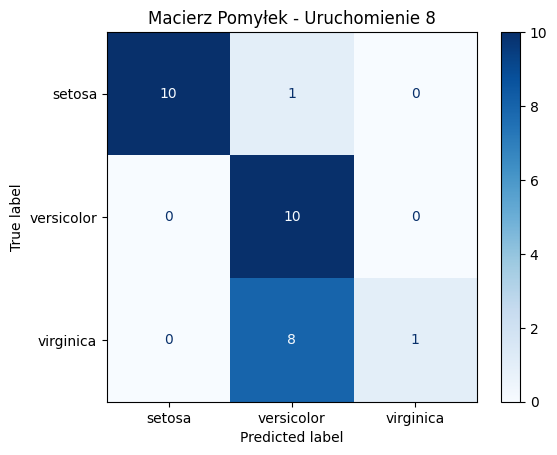

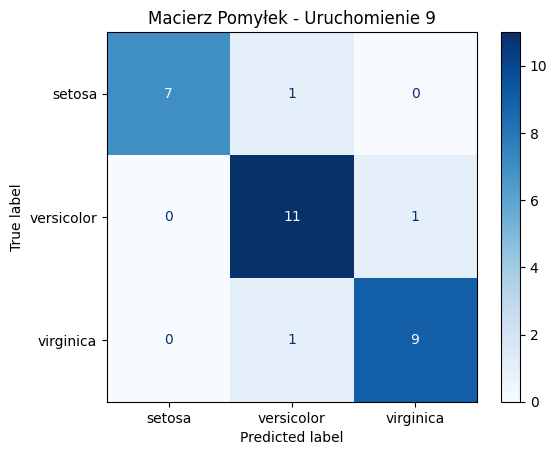

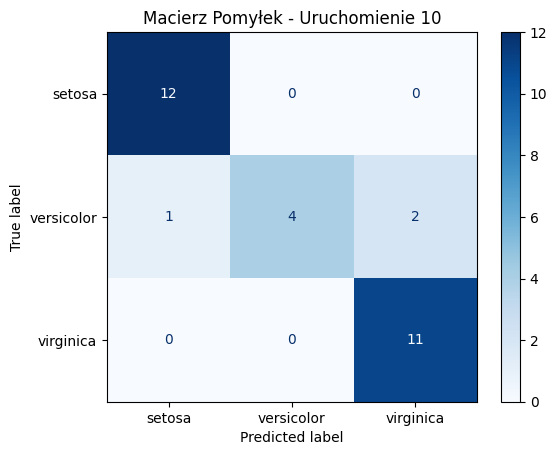

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data_iris = load_iris()
perceptron_layer = Perceptron(tol=1e-3, max_iter=20, early_stopping=True)
accuracies = []

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(data_iris['data'], data_iris['target'], test_size=0.2)
    perceptron_layer.fit(X_train, Y_train)
    Y_predicted = perceptron_layer.predict(X_test)

    confusion_matrix_model = confusion_matrix(Y_test, Y_predicted)
    print(f"Uruchomienie: {i+1}")
    print("Macierz pomyłek:")
    print(confusion_matrix_model)

    accuracy = np.trace(confusion_matrix_model) / np.sum(confusion_matrix_model)
    accuracies.append(accuracy)
    print(f"Dokładność: {accuracy:.2f}\n")

    # macierz pomyłek
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_model, display_labels=data_iris['target_names'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Macierz Pomyłek - Uruchomienie {i+1}")
    # plt.show()

mean_accuracy = np.mean(accuracies)
print(f"Srednia dokładnosc po 10 uruchomieniach: {mean_accuracy:.2f}")

4)
Proszę spróbować podzielić zbiór irysów na zbiór uczący i testujący na co najmniej 3 różne sposoby. Jak duży jest wpływ podziału na wynik?

Rozmiar zbioru testowego: 0.1
Macierz pomyłek:
[[4 0 0]
 [0 5 0]
 [0 1 5]]
Dokładność: 0.93



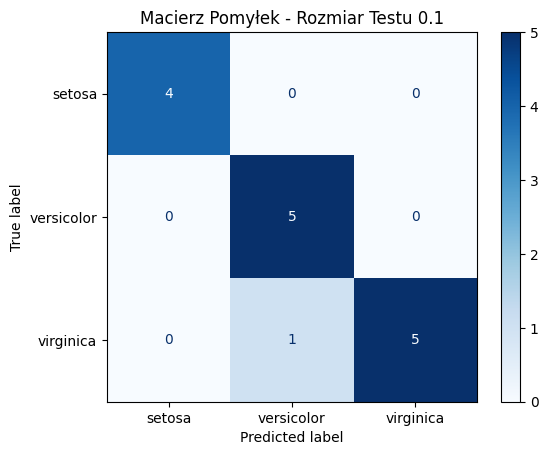

Rozmiar zbioru testowego: 0.3
Macierz pomyłek:
[[18  0  0]
 [ 2  0 11]
 [ 0  0 14]]
Dokładność: 0.71



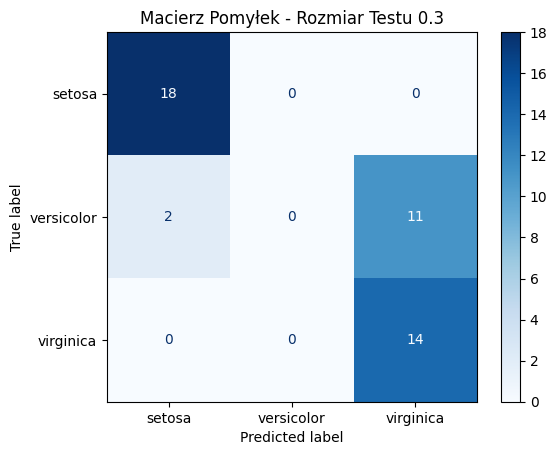

Rozmiar zbioru testowego: 0.5
Macierz pomyłek:
[[28  0  0]
 [ 0  7 11]
 [ 0  0 29]]
Dokładność: 0.85



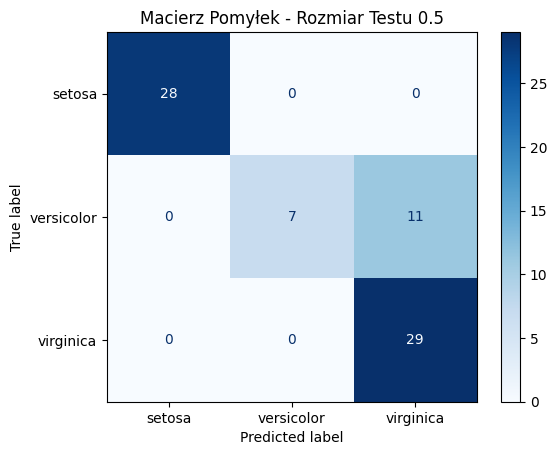

Rozmiar zbioru testowego: 0.8
Macierz pomyłek:
[[38  0  0]
 [ 0 40  0]
 [ 0 42  0]]
Dokładność: 0.65



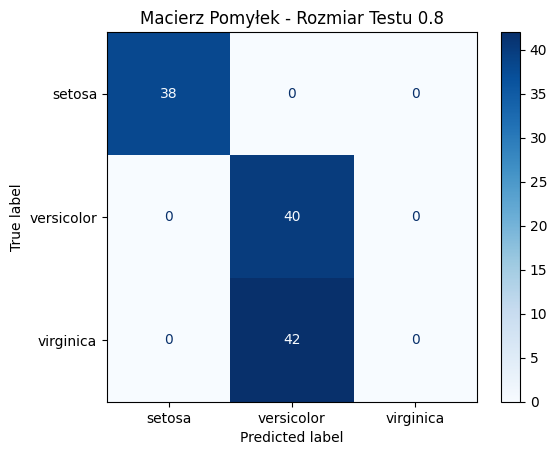

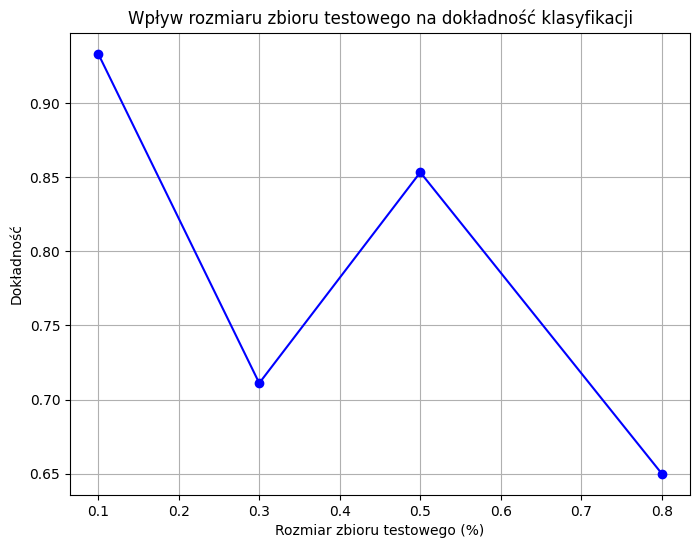

Średnia dokładność po 4 uruchomieniach: 0.79


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


data_iris = load_iris()
perceptron_layer = Perceptron(tol=1e-4, max_iter=20, early_stopping=True)
test_size_arr = [0.1, 0.3, 0.5, 0.8]

accuracies = []

for i in test_size_arr:
    X_train, X_test, Y_train, Y_test = train_test_split(data_iris['data'], data_iris['target'], test_size=i)
    perceptron_layer.fit(X_train, Y_train)

    Y_predicted = perceptron_layer.predict(X_test)

    confusion_matrix_model = confusion_matrix(Y_test, Y_predicted)
    print(f"Rozmiar zbioru testowego: {i}")
    print("Macierz pomyłek:")
    print(confusion_matrix_model)

    accuracy = np.trace(confusion_matrix_model) / np.sum(confusion_matrix_model)
    accuracies.append(accuracy)
    print(f"Dokładność: {accuracy:.2f}\n")

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_model, display_labels=data_iris['target_names'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Macierz Pomyłek - Rozmiar Testu {i}")
    plt.show()

plt.figure(figsize=(8,6))
plt.plot(test_size_arr, accuracies, marker='o', linestyle='-', color='b')
plt.title('Wpływ rozmiaru zbioru testowego na dokładność klasyfikacji')
plt.xlabel('Rozmiar zbioru testowego (%)')
plt.ylabel('Dokładność')
plt.grid(True)
plt.show()

mean_accuracy = np.mean(accuracies)
print(f"Średnia dokładność po 4 uruchomieniach: {mean_accuracy:.2f}")


5)Proszę sprawdzić wpływ ilości epok na poprawność klasyfikacji zbioru irysów z poprzednich zadań, dla wybranych ilości epok (polecamy spróbować od jak najmniejszej, np. od 1 lub 2 epok). Żeby zapobiec wcześniejszemu przerywaniu uczenia, w pakiecie Sklearn można ustalić argument tol na odpowiednio małą liczbę czy ustawiając argument early_stopping na False. Można też zamiast tego (lub dodatkowo) nie wyłączać tych kryteriów i zamiast tego prawdzić wartość ilość faktycznych epok potrzebnych do ich osiągnięcia (n_iter_) Proszę przedstawić wnioski, np. na wykresie zależności średniej trafności klasyfikacji na zbiorze testującym w zależności od liczby epok.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


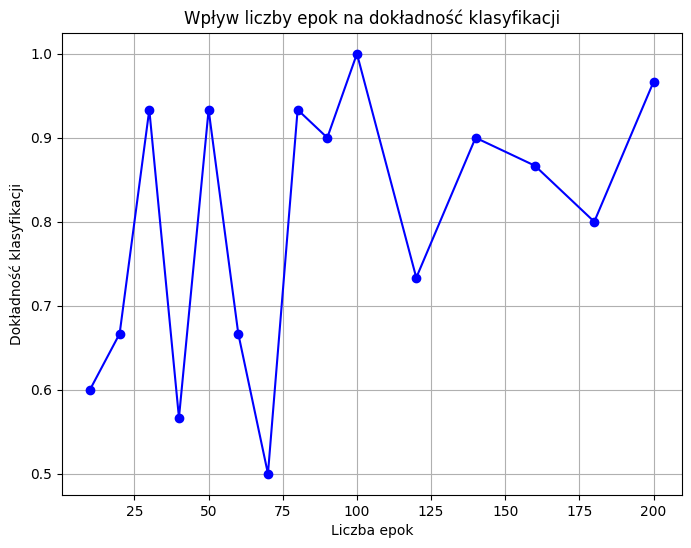

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

data_iris = load_iris()
epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]
accuracies = []

for i in epochs:
    perceptron_layer = Perceptron(tol=1e-4, max_iter=i, early_stopping=False)
    X_train, X_test, Y_train, Y_test = train_test_split(data_iris['data'], data_iris['target'], test_size=0.2)
    perceptron_layer.fit(X_train, Y_train)
    accuracy = perceptron_layer.score(X_test, Y_test)
    accuracies.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracies, marker='o', linestyle='-', color='b')
plt.title('Wpływ liczby epok na dokładność klasyfikacji')
plt.xlabel('Liczba epok')
plt.ylabel('Dokładność klasyfikacji')
plt.grid(True)
plt.show()
